# Statistics 2: Probability, Distributions, & Tests

**Package/module refs:** 

- [pandas](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.html) for storing your data
- [numpy](http://docs.scipy.org/doc/numpy-1.10.0/reference/arrays.html) also for storing data (as arrays), and other awesome things
- [math.factorial](https://docs.python.org/2/library/math.html) for factorials
- [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) for t-tests and distribution functions
- [matplotlib.pyplot](http://matplotlib.org/api/pyplot_api.html) for visualizing your data
- [my tutorial on plotting data](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb). It's focused on Astronomy but is universally (HA!) applicable

## Handling Null Data

No dataset is perfect. Most data that you work with, especially human-compiled data, will be somewhat incomplete. Missing values. When incomplete data is loaded with [pandas.read_csv](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.read_csv.html), [numpy.loadtxt](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.loadtxt.html), or [numpy.genfromtxt](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.genfromtxt.html), those missing pieces will be filled by a default `NaN` (not a number) value.

In [1]:
import pandas as pd
import numpy as np

incomplete_data = pd.read_csv("../downloads/nmhw_sample_data.csv")
incomplete_data

,Name,Age,Hometown,Country,Desired Income,Favorite Food,Number of Cats
0,James,22,New York,NaN,75000.0,NaN,0.0
1,Bob,25,Seattle,USA,0.0,pad thai,2.0
2,Annette,28,San Francisco,USA,NaN,spaghetti,1.0
3,Florence,23,Beijing,China,60000.0,xiaolong bao,4.0
4,Martha,30,Kansas City,NaN,NaN,corn,3.0
5,Desean,27,Newark,USA,85000.0,NaN,NaN
6,Jamal,28,New York,NaN,65000.0,pizza,3.0
7,Kaede,31,Kyoto,Japan,65000.0,sushi,4.0
8,Milton,23,Austin,NaN,78000.0,bbq,NaN
9,Ivana,29,Moscow,Russia,NaN,borscht,1.0


Always keep in mind that a "NaN" value ***only*** signifies a non-entry. Often, it's tempting to just replace NaN values with zeros, or `False`, but to universally assume that you can or even should do that doesn't do justice to what a NaN is. To be sure, NaN values ***are numerical*** but neither represent any actual number nor evaluate as False, None, or infinity.

In [2]:
this_val = incomplete_data.Country.iloc[0]
print(this_val)
print(type(this_val))
print((this_val == 0) | (this_val < 0) | (this_val > 0) | (this_val == np.inf))
print((this_val == False) | (this_val == None))
if this_val:
    print("This still prints something because it still represents a thing.")

nan
<class 'float'>
False
False
This still prints something because it still represents a thing.


There are many ways to handle NaN values and many entries (or lackthereof) that should be recognized as such. Pandas allows you to recognize a variety of values as null upon entry with the `na_values` parameter of `pandas.read_csv`

In [3]:
incomplete_data = pd.read_csv("../downloads/nmhw_sample_data.csv", na_values=["null", "NULL", -9999, np.inf])

Once assigned to a variable, NaN values can be dealt with on a column-by-column basis or throughout the entire DataFrame with the `fillna` method. A NaN might be set to some default value, as you may be able to assume a meaningful value for a non-entry. You may also decide that a different column's NaN may need to be evaluated in order to get it out of the way in filtering or some other data process later on.

In [4]:
incomplete_data.Country.fillna("USA", inplace=True)
print(incomplete_data.Country)

0        USA
1        USA
2        USA
3      China
4        USA
5        USA
6        USA
7      Japan
8        USA
9     Russia
10    Brasil
Name: Country, dtype: object


In [5]:
incomplete_data["Number of Cats"].fillna(-99, inplace=True)
print(incomplete_data["Number of Cats"])

0      0.0
1      2.0
2      1.0
3      4.0
4      3.0
5    -99.0
6      3.0
7      4.0
8    -99.0
9      1.0
10     2.0
Name: Number of Cats, dtype: float64


Other times it would make more sense to just leave NaNs as they are. Aggregate operations like means and sums will just ignore them. Though be aware that they will screw up iterative processes with strings.

In [6]:
print(incomplete_data["Desired Income"].mean())
incomplete_data["Favorite Food"].map(lambda x: x.split(" "))

64750.0


AttributeError: 'float' object has no attribute 'split'

It's worth noting that while NaN values essentially mean the same no matter what, not all NaNs are created equal. A pandas nan is not the same as a numpy nan (although oddly-enough will be recognized as a nan-like value), and vice versa.

In [7]:
print(this_val == np.nan)
print(np.isnan(this_val))
print(pd.isnull(np.nan))
print(type(np.nan))

False
True
True
<class 'float'>


At the end of the day, no matter what you decide to do with NaNs make sure that you know your data and have an idea of what you want to do with it. All choices will follow from the nature of your data set and what your analysis entails.

## Basic Rules of Probability
- The chance that some event happens given all events that could happen in that category.
- Probabilities denote **the chance** that something happens, **not the guarantee**
- $0 \le p(x) \le 1$ or $0\% \le p(x) \le 100\%$
- For any set of associated but separate events, $\displaystyle\sum_i p(x_i) = 1$
- For related events A and B, the probablity that they happen together is

\begin{align}
p(A \cap B) = p(A) \cdot p(B)
\end{align}

- The probability that either one of them happens is 

\begin{align}
p(A \cup B) = p(A) + p(B) - p(A \cap B)
\end{align}

<img src="../downloads/sum_of_probs.png"/>

## Examples:
- p(coin toss = Head)
- p(rolling D20 and getting ≤ 11)
- p(5 coin tosses = Head)
- For bag of 4 white balls and 6 black balls, p(drawing 2 white then 2 black)

## Probability Distributions

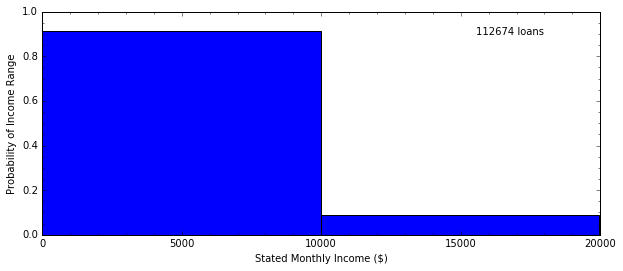

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("../downloads/prosperLoanData_truncated.csv", sep=",")
data = data[data.StatedMonthlyIncome < 2E4]
H, edges = np.histogram(data.StatedMonthlyIncome, bins=2)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g loans" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Stated Monthly Income ($)")
ax.set_ylabel("Probability of Income Range")
ax.minorticks_on()
plt.show()

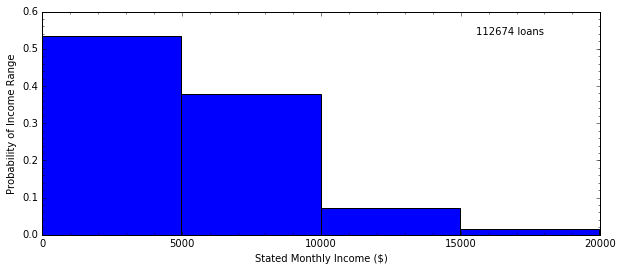

In [9]:
H, edges = np.histogram(data.StatedMonthlyIncome, bins=4)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g loans" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Stated Monthly Income ($)")
ax.set_ylabel("Probability of Income Range")
ax.minorticks_on()
plt.show()

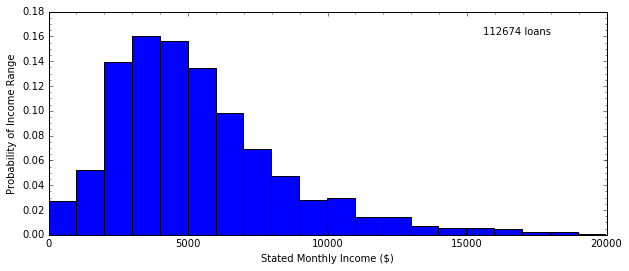

In [10]:
H, edges = np.histogram(data.StatedMonthlyIncome, bins=20)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g loans" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Stated Monthly Income ($)")
ax.set_ylabel("Probability of Income Range")
ax.minorticks_on()
plt.show()

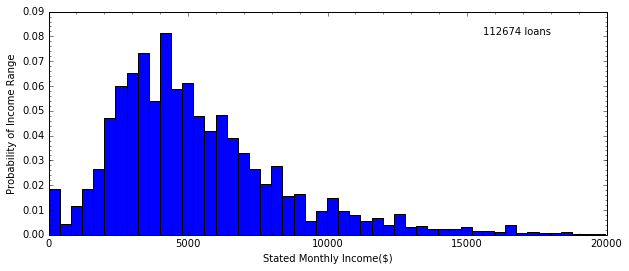

In [11]:
H, edges = np.histogram(data.StatedMonthlyIncome, bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.9, 0.9, "%g loans" % len(data),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Stated Monthly Income($)")
ax.set_ylabel("Probability of Income Range")
ax.minorticks_on()
plt.show()

Note that here I use `ax` to access the plot space of the figure, so that I can place text wherever I want it. If I don't use the `transform` parameter, then if I want to place text on a figure I have to specify the exact coordinates in the data space for where I want it to be. With transforming to the coordinate space of the figure, I can use the fact that coordinate space goes from 0 to 1 horizontally and vertically to place text easily. 

One issue is that if you use `ax`, you set axis labels using `ax.set_xlabel` and `ax.set_ylabel` instead of the normal methods with `plt.xlabel` and `plt.ylabel`. Similar for setting axis limits.

Also note that with numpy arrays (and pandas DataFrames), you can perform arithmetic on the entire object at once. Also note that with numpy arrays specifically, you cannot alter the size of the array once it's been created. Fixed-size arrays make it faster, but the immutability of size can be a little difficult. At least you can alter the values inside the array easily through indexing.

## Cumulative Probability Distribution
- The probability of getting a value less than x

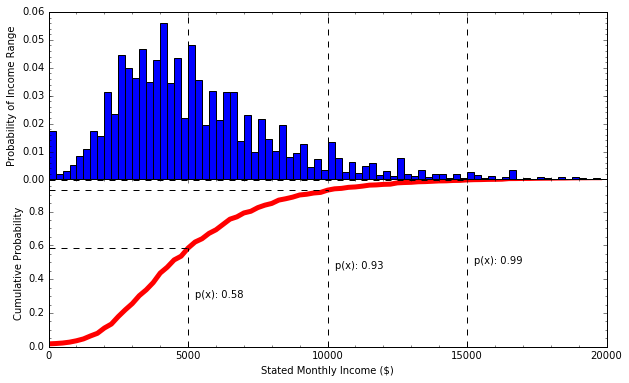

In [12]:
H, edges = np.histogram(data.StatedMonthlyIncome, bins=np.linspace(0, 2E4, 81))
incomes = [5000, 10000, 15000]

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(hspace=0) # smooshes vertical subplots together
ax = plt.subplot(211) # 2 rows, 1 column, put this figure in the first cell
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
for ii in incomes:
    ax.plot([ii, ii], [0, 0.06], linestyle="--", color='k')
ax.set_ylabel("Probability of Income Range")
ax.set_xticklabels([]) # kills the numbers on the x-axis for this plot
ax.minorticks_on()

ax = plt.subplot(212) # 2 rows, 1 column, put this figure in the first cell
probabilities = H.cumsum() / float(sum(H))
ax.plot(edges[:-1], probabilities, linewidth=5, color="r")
for ii in incomes:
    prob = probabilities[edges[:-1] == ii]
    ax.plot([ii, ii], [0, prob], linestyle="--", color='k')
    ax.plot([0, ii], [prob, prob], linestyle="--", color='k')
    ax.text(ii + 2.5E2, prob * 0.5, "p(x): %.2f" % prob)
ax.set_xlabel("Stated Monthly Income ($)")
ax.set_ylabel("Cumulative Probability")
ax.set_ylim(0, 0.99)
ax.minorticks_on()
plt.savefig("../downloads/cumulative_distribution.png")
plt.show()

Numpy arrays have several methods, one of which is `cumsum()`. This method performs a cumulative sum on your array from left to right.

```
arr = np.array([1, 1, 1, 1, 1, 1, 1, 1])
arr.cumsum()
>>> array([1, 2, 3, 4, 5, 6, 7, 8])
```

<img src="../downloads/cumulative_distribution.png" />

- "If I choose a person from this data set at random, there's a 58% chance that their monthly salary is less than \$5,000"
- "..., there's a 35% chance their monthly salary is between \$5,000 and \$10,000"
- "..., there's a 1% chance their monthly salary is greater than \$15,000"

## The Gaussian/Normal Distribution
- Theoretical curve describing the probability of getting some value x, given the mean and standard deviation of the data

<img src="../downloads/gaussian_distribution.png" />

- $p(x|\sigma, \mu) = \displaystyle\frac{1}{\sqrt{2\pi\sigma^2}}\exp{\left[\frac{-(x - \mu)^2}{2\sigma^2}\right]}$
- The most commonly-used distribution
- Ref: **Central Limit Theorem**
- The Gist: The mean of samples drawn from an almost arbitrary distribution will approx. follow a Gaussian
- Applied to everything, even when not appropriate

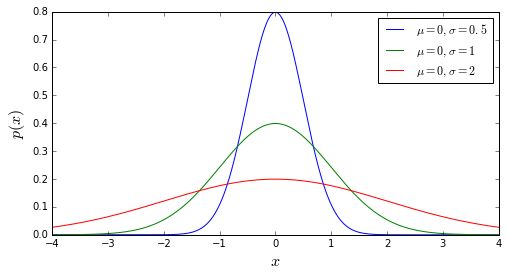

In [13]:
del data

def gaussian(x, mu, std):
    return (1. / np.sqrt(2 * np.pi * std**2) * np.exp(-0.5 * ((x - mu) / std)**2))
x = np.linspace(-4, 4, 1000)
fig = plt.figure(figsize=(8, 4))
plt.plot(x, gaussian(x, 0, 0.5), label="$\mu = 0, \sigma = 0.5$")
plt.plot(x, gaussian(x, 0, 1), label="$\mu = 0, \sigma = 1$")
plt.plot(x, gaussian(x, 0, 2), label="$\mu = 0, \sigma = 2$")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$p(x)$", fontsize=16)
plt.legend()
plt.savefig("../downloads/gaussian_distribution.png")
plt.show()

## The Binomial Distribution
<img src="../downloads/binomial_distribution.png" />
- Describes the distribution of a variable that can only take two values (0/1, False/True, Heads/Tails)
- For *N* trials...
- I know the probability *b* of getting one outcome per trial...
- I can describe the probability of getting *k* successes of that outcome:

$$p(k|b,N) = \displaystyle\frac{N!}{k!(N-k)!}b^k(1 - b)^{N-k}$$

- The mean $\bar{k} = b\,N$
- The standard deviation $\sigma_k = \sqrt{N \,b \,(1 - b)}$
- **NOTE: does not describe probability of getting consecutive successes or any particular combination of successes & failures** 

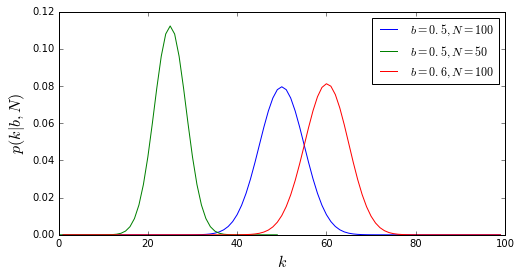

In [14]:
from math import factorial


def binomial(k, b, N):
    return float(factorial(N)) / (factorial(k) * factorial(N - k)) * b ** k * (1 - b)**(N - k)

x = range(1, 100)
y0 = [binomial(val, 0.5, 100) for val in x]
y1 = [binomial(val, 0.5, 50) for val in range(0, 50)]
y2 = [binomial(val, 0.6, 100) for val in x]
fig = plt.figure(figsize=(8, 4))
plt.plot(x, y0, label="$b = 0.5, N = 100$")
plt.plot(range(0, 50), y1, label="$b = 0.5, N = 50$")
plt.plot(x, y2, label="$b = 0.6, N = 100$")
plt.xlabel("$k$", fontsize=16)
plt.ylabel("$p(k | b, N)$", fontsize=16)
plt.legend()
plt.savefig("../downloads/binomial_distribution.png")
plt.show()

## Hypothesis Testing and Measurement Significance
- Chance occurrence vs meaningful occurrence
- Sticking with the Gaussian distribution of random samples
- Either reject the Null Hypothesis $H_0$ or fail to reject it. 
- **Can never PROVE absolutely True or absolutely False**
- Hypothesis conclusions entirely dependent on the sample. Cannot be assumed to be universal.
- Significance levels ($\alpha$) help decide whether to reject $H_0$
    - Typical $\alpha$-levels: 0.05, 0.025, 0.01
- Statistical tests produce two things: 
    - a numerical statistic showing the distance between the means of two distributions (more later)
    - a "p-value" showing the probability of getting this result **given the null hypothesis**
- If your p-value is less than some alpha-level, then it's statistically significant to that level
    - ex: p = 0.035; my test rejects the null hypothesis at $\alpha = 0.05$ significance level, but not at the $\alpha = 0.025$ level.
    - ex: p = 0.13; my tests fails to reject the null hypothesis

## Students' t-Test
- "Students" was the pseudonym of the originator
- Computes a statistic (the "t" statistic) based on the means and variances of samples

    $$t = \displaystyle\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

- **Defs:**
    - $s_i$: standard deviation of sample $i$
    - $n_i$: number of items in sample $i$
- **Use Cases**
    - test whether a subsample is significantly different from the population
    - test if two subsamples from the same population are significantly different
    - test if two independent samples are significantly different
- **Note: Data should be somewhat "normally" distributed (so visualize). Non-normal data needs a different test (next time**

## t-Test example: Seattle Weather in 2010
- **Hypothesis:** The temperature during the Spring was significantly different than the temperature during the Fall
- **Null hypothesis:** The temperature during the Spring wasn't significantly different
- **Define terms:**
    - Spring: March through May
    - Fall: September through November

In [15]:
import os

data_dir = "../downloads/seattle_weather/"
weather_files = [
    data_dir + f for f in os.listdir(data_dir) if f.startswith("MonthlyHistory")]
seattle_weather = pd.read_csv(weather_files[0])

for f in weather_files[1:]:
    indata = pd.read_csv(f)
    if "PDT" in indata.columns:
        indata.rename(columns={'PDT': 'PST'}, inplace=True)
        
    seattle_weather = pd.concat((seattle_weather, indata), ignore_index=True)

`pandas.concat` takes two DataFrames and merges them into one DataFrame. If you don't set `ignore_index=True` then it will preserve the index values that each individual DataFrame had before merging, which can become problematic when slicing the new merged frame

Note that when concatenating DataFrames, any columns that exist in one and not in the other will get filled with null values. Above, I just change the name of the "PDT" column because not every data file has that column despite them all showing roughly the same data.

In [16]:
seattle_weather["year"] = seattle_weather.PST.map(lambda x: float(x.split("-")[0]))
seattle_weather["month"] = seattle_weather.PST.map(lambda x: float(x.split("-")[1]))
seattle_weather["day"] = seattle_weather.PST.map(lambda x: float(x.split("-")[2]))

You can create new columns in a DataFrame much like how you can create new keys in a dictionary, by specifying the column name that you want. You can also get data from columns in two ways: calling that column up with the square bracket notation `DataFrame["column_name"]` or with dot notation `DataFrame.column_name`. The main difference is that dot notation cannot handle column names with spaces.

In [17]:
spring_2010 = (seattle_weather.year == 2010) & (seattle_weather.month > 2) & (seattle_weather.month < 6)
fall_2010 = (seattle_weather.year == 2010) & (seattle_weather.month > 8) & (seattle_weather.month < 12)

You can select indices of data matching specific criteria. The above lines produce two pandas Series objects (effectively a one-column DataFrame) holding boolean values of `True` when a row matches your criteria, and `False` when it doesn't. You can do the same with numpy arrays (where the same selection will produce numpy arrays filled with booleans)

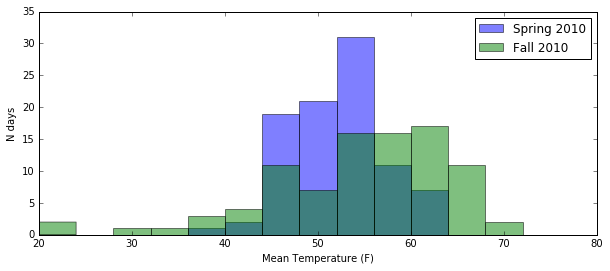

In [18]:
plt.figure(figsize=(10, 4))
opacity = 0.5
mean_temp = "Mean TemperatureF"
plt.hist(seattle_weather[spring_2010][mean_temp], bins=np.arange(20, 76, 4), alpha=opacity, label="Spring 2010")
plt.hist(seattle_weather[fall_2010][mean_temp], bins=np.arange(20, 76, 4), alpha=opacity, label="Fall 2010")
plt.legend()
plt.xlabel("Mean Temperature (F)")
plt.ylabel("N days")
plt.show()

The `alpha` parameter controls the opacity of whatever you're plotting, whether they are bars, points, lines, circles, whatever. Opacity goes from 0 to 1. Works best when you you have heavily overlapping data. In the event of overlapping data, plot the larger data set first (in the background) so that it doesn't drown out the smaller set.

In [19]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(seattle_weather[spring_2010][mean_temp],
                            seattle_weather[fall_2010][mean_temp])
print("Results:\n\tt-statistic: %.5f\n\tp-value: %.5f" % (t_stat, p_value))

Results:
	t-statistic: -2.09063
	p-value: 0.03796


I can reject the null hypothesis at the p < 0.05 significance level. **At that level, the mean temperature in Spring and Fall 2010 was significantly different.**

### t-tests in SciPy.stats

- **[ttest_ind](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind):** performs a t-test on two sample distributions and returns the t-statistic (useful later) and the p-value; useful for two independent samples from the same population (or very similar but different populations)
- **[ttest_1samp](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.ttest_1samp.html#scipy.stats.ttest_1samp):** useful for one sample distribution in comparison to the mean of a population
- **[ttest_rel](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel):** useful for two related samples